# K-Mean Clustering

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import pickle

# Load Dataframe

In [3]:
# load resource_priority_df from a file
with open('resource_priority_df.pickle', 'rb') as f:
    resource_priority_df = pickle.load(f)
    
# load ability_priority_df from a file
with open('ability_priority_df.pickle', 'rb') as f:
    ability_priority_df = pickle.load(f)
    
# load player_df from a file (contains lane info)
with open('player_df.pickle', 'rb') as f:
    player_df = pickle.load(f)

# Function for visualizing counts

In [6]:
def show_cluster_counts(dataframe, graph_name):
    role_counts = np.bincount(dataframe)

    plt.bar(range(len(role_counts)), role_counts)

    plt.xlabel('Role')
    plt.ylabel('Count')
    plt.title(graph_name)

    plt.show()

# Select a hero for calculation

In [20]:
hero_id = 7  # earthshaker hero id = 7

# K-Mean -- Resource Prioritization

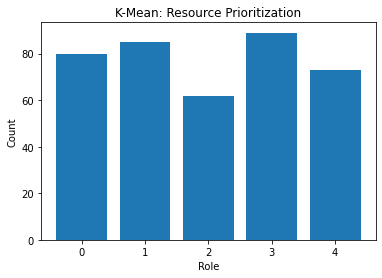

In [26]:
X_rp = resource_priority_df[resource_priority_df['hero_id'] == hero_id]

scale = StandardScaler()
scaled_df_rp = scale.fit_transform(X_rp)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df_rp)
target_hero_roles_rp = kmeans.predict(scaled_df_rp)

show_cluster_counts(target_hero_roles_rp, "K-Mean: Resource Prioritization")

# K-Mean -- Ability Prioritization

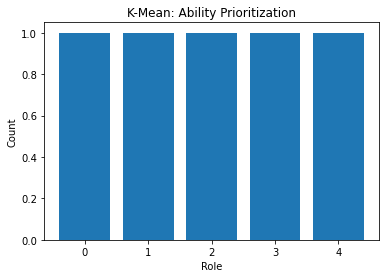

In [38]:
X_ap = ability_priority_df[ability_priority_df['player_slot'] == 0] # PLACEHOLDER for hero id 

scale = StandardScaler()
scaled_df_ap = scale.fit_transform(X_ap)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df_ap)
target_hero_roles_ap = kmeans.predict(scaled_df_ap)

show_cluster_counts(target_hero_roles_ap, "K-Mean: Ability Prioritization")

# K-Mean -- Initial Lane

In [48]:
X_lane = player_df[player_df['hero_id'] == hero_id]
X_lane

,match_id,hero_id,player_slot,team,gold,gold_spent,gold_total,xpm,lane,team_gold_total,gold_priority,team_xpm_total,xpm_priority
291,7083305097,7,1,1,2414,13865,16279,457,3.0,125297,0.129923,3073,0.148715
528,7082722396,7,131,0,1052,4015,5067,426,1.0,32969,0.153690,1971,0.216134
910,7082204525,7,0,1,863,8690,9553,480,3.0,59412,0.160792,2427,0.197775
1230,7081372567,7,0,1,164,11510,11674,513,2.0,54544,0.214029,2273,0.225693
1260,7081318183,7,0,1,1027,9515,10542,578,3.0,78895,0.133621,3208,0.180175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99482,6905994522,7,2,1,5721,590,6311,48,2.0,32130,0.196421,258,0.186047
99499,6905963413,7,132,0,854,14820,15674,539,1.0,113960,0.137539,3285,0.164079
99574,6905867438,7,4,1,1956,10865,12821,492,3.0,87386,0.146717,2912,0.168956
99713,6905733931,7,3,1,849,12210,13059,565,3.0,108034,0.120879,3794,0.148919


In [49]:
X_lane = player_df[player_df['hero_id'] == hero_id]
X_lane = X_lane[['player_slot', 'team', 'lane']]
X_lane

,player_slot,team,lane
291,1,1,3.0
528,131,0,1.0
910,0,1,3.0
1230,0,1,2.0
1260,0,1,3.0
...,...,...,...
99482,2,1,2.0
99499,132,0,1.0
99574,4,1,3.0
99713,3,1,3.0


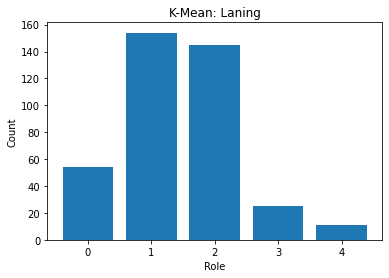

In [50]:
X_lane = player_df[player_df['hero_id'] == hero_id]
X_lane = X_lane[['player_slot', 'team', 'lane']]

scale = StandardScaler()
scaled_df_lane = scale.fit_transform(X_lane)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df_lane)
target_hero_roles_lane = kmeans.predict(scaled_df_lane)

show_cluster_counts(target_hero_roles_lane, "K-Mean: Laning")